# Logistic Regression Model

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [2]:
data=pd.read_csv('fake_genuine_merge.csv',header=0)
data.head(10)

,username,full_name,is_verified,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes,is_fake
0,_kriiishnaaa____,Krishna Rajeev,0,0,23,1,920,694,1,6,0,1,44,12,4289,237,14,12,357.416667,0
1,sim.run03,Simran Kathpalia,0,0,27,0,374,379,0,6,0,1,14,17,1473,189,16,12,122.750000,0
2,sarang_dileep_,Sarang Dileep,0,0,0,0,476,554,0,0,0,1,9,1,1086,75,13,9,120.666667,0
3,krishna_manoj._,KRISHNA MANOJ✨,0,0,23,0,524,516,0,5,0,1,0,0,0,0,14,0,0.000000,0
4,ritka_098,Ritika,0,1,0,0,680,775,0,12,0,1,0,0,0,0,6,0,0.000000,0
5,officialcjunior,aswin chandanaveli �️,0,0,36,1,907,916,1,11,1,0,58,17,2484,122,21,12,207.000000,0
6,sidharth.a_s_s,sidhartha sakthidharan,0,0,28,0,506,488,0,0,0,1,13,17,1603,98,22,12,133.583333,0
7,_adil1._,Adil Ashraf,0,0,0,0,1486,809,0,12,1,0,18,82,5816,229,11,12,484.666667,0
8,itzz_me__anu,Anugraha,0,0,32,0,363,433,0,12,0,1,5,7,983,85,8,5,196.600000,0
9,_vipulv,ѴιƤʋ˩ Ѵ,0,0,85,0,422,417,1,12,0,0,16,50,2194,470,7,12,182.833333,0


In [3]:
normalized=pd.read_csv('fake_genuine_merge.csv')
normalized.drop('username',inplace=True,axis=1)
normalized.drop('full_name',inplace=True,axis=1)
data=normalized
data.head()

,is_verified,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes,is_fake
0,0,0,23,1,920,694,1,6,0,1,44,12,4289,237,14,12,357.416667,0
1,0,0,27,0,374,379,0,6,0,1,14,17,1473,189,16,12,122.750000,0
2,0,0,0,0,476,554,0,0,0,1,9,1,1086,75,13,9,120.666667,0
3,0,0,23,0,524,516,0,5,0,1,0,0,0,0,14,0,0.000000,0
4,0,1,0,0,680,775,0,12,0,1,0,0,0,0,6,0,0.000000,0


In [4]:
Y=data["is_fake"]
X=data.loc[:, data.columns != 'is_fake']
print(Y.head())
print(X.head())

0    0
1    0
2    0
3    0
4    0
Name: is_fake, dtype: int64
   is_verified  has_anonymous_profile_picture  biography_len  external_url  \
0            0                              0             23             1   
1            0                              0             27             0   
2            0                              0              0             0   
3            0                              0             23             0   
4            0                              1              0             0   

   followers  following  has_clips  highlight_count  is_professional_account  \
0        920        694          1                6                        0   
1        374        379          0                6                        0   
2        476        554          0                0                        0   
3        524        516          0                5                        0   
4        680        775          0               12                 

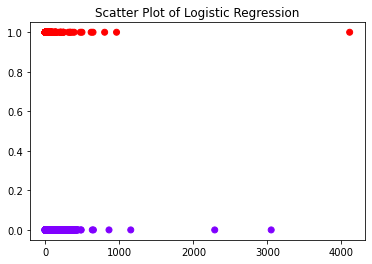

In [5]:
plt.scatter(X.average_likes, Y, c=Y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1)
x_test.head()

,is_verified,has_anonymous_profile_picture,biography_len,external_url,followers,following,has_clips,highlight_count,is_professional_account,is_private,media_count,total_tags,total_likes,total_comments,name_length,media_count_of_data_collected,average_likes
84,0,0,61,0,659,965,1,8,1,0,17,15,2551,156,6,12,212.583333
688,0,1,0,0,11,8,0,0,0,0,0,0,0,0,4,0,0.000000
142,0,0,71,0,675,696,0,1,0,1,0,0,0,0,15,0,0.000000
794,0,1,0,0,11,61,0,0,0,0,0,0,0,0,0,0,0.000000
744,0,0,48,0,279,3,0,0,0,0,0,0,0,0,9,0,0.000000


In [7]:
scaler = StandardScaler()#gaved best accuracy than normalisation
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[ 0.        , -0.46388563,  0.40659777, ..., -0.21830095,
         1.40321413,  0.59633254],
       [ 0.        , -0.46388563, -0.15832373, ...,  1.15111083,
         1.40321413,  0.68789517],
       [ 0.        , -0.46388563,  1.44228718, ...,  0.46640494,
        -0.58615274, -0.04063924],
       ...,
       [ 0.        , -0.46388563, -0.81739882, ...,  0.29522847,
         0.4085307 , -0.29960234],
       [ 0.        , -0.46388563, -0.51139967, ..., -0.04712448,
        -0.38721605, -0.36457922],
       [ 0.        , -0.46388563, -0.20540053, ...,  1.3222873 ,
         1.00534076, -0.09855178]])

In [8]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1)

In [10]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 0.          0.97831942  0.40499919 -0.28234193  2.37431942  0.25294932
   0.2325681  -0.50851976 -0.11936189 -1.32362732  0.19620872 -0.29139336
  -0.86596785 -1.29827078 -0.41758245 -0.20922443  0.14345723]]
[-0.68462586]


In [11]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0])

In [12]:
x_test

array([[ 0.        , -0.46388563,  0.61844333, ..., -0.73183036,
         1.40321413,  0.37023566],
       [ 0.        ,  2.15570379, -0.81739882, ..., -1.0741833 ,
        -0.98402611, -0.47299995],
       [ 0.        , -0.46388563,  0.85382729, ...,  0.80875788,
        -0.98402611, -0.47299995],
       ...,
       [ 0.        , -0.46388563,  2.10136226, ...,  0.29522847,
         1.40321413, -0.01849232],
       [ 0.        , -0.46388563, -0.72324523, ..., -0.90300683,
        -0.38721605, -0.14905997],
       [ 0.        , -0.46388563,  1.37167199, ...,  1.15111083,
         1.40321413, -0.1427795 ]])

In [13]:
print(data.loc[data['average_likes'] == 0.000000])

     is_verified  has_anonymous_profile_picture  biography_len  external_url  \
3              0                              0             23             0   
4              0                              1              0             0   
11             0                              0             10             0   
23             0                              0              8             0   
29             0                              0              5             0   
49             0                              0             52             0   
51             0                              0             52             0   
58             0                              0             26             0   
59             0                              0              0             0   
60             0                              0            149             0   
63             0                              0             62             0   
69             0                        

In [14]:
confusion_matrix(y_test, y_pred)

array([[105,  14],
       [ 19,  86]])

In [15]:
log_reg.score(x_test,y_test)*100

85.26785714285714

In [16]:
len(y_pred)

224

# KFold Validation

In [17]:
def accuracy(Y_pred,Y_test):
    Y_test=Y_test.values
    count=0
    for i in range(0,len(Y_pred)):
        if(Y_pred[i]==Y_test[i]):
            count=count+1
    print("accuracy of kfold :"+str((count/len(Y_pred))*100))
    return (count/len(Y_pred))*100

mean=0
import pandas as pd
from sklearn.model_selection import KFold
data=(data-data.min())/(data.max()-data.min())
data.drop('is_verified',inplace=True, axis=1)
Y_train=data["is_fake"]
X_train=data.loc[:, data.columns != 'is_fake']
cv = KFold(n_splits=4, random_state=1, shuffle=True)
kfold=cv.split(X_train, Y_train)
for k, (train, test) in enumerate(kfold):
    log_reg.fit(X_train.iloc[train, :], Y_train.iloc[train])
    Y_pred=log_reg.predict(X_train.iloc[test, :])
    mean=mean+accuracy(Y_pred,Y_train.iloc[test])
print(mean/4)

accuracy of kfold :85.71428571428571
accuracy of kfold :79.91071428571429
accuracy of kfold :84.82142857142857
accuracy of kfold :77.67857142857143
82.03125


# Sayooj B Kumar

## AM.EN.U4CSE19050